In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Create the complete DataFrame
data = {
    'Phase': [
        'Phase 1', 'Phase 1', 'Phase 1', 'Phase 1',
        'Phase 2', 'Phase 2', 'Phase 2', 'Phase 2',
        'Phase 3', 'Phase 3', 'Phase 3', 'Phase 3',
        'Phase 4', 'Phase 4', 'Phase 4', 'Phase 4'
    ],
    'Model': [
        'Xgboost', 'Catboost', 'Random Forest', 'ExtraTreesClassifier',
        'Xgboost', 'Catboost', 'Random Forest', 'ExtraTreesClassifier',
        'Xgboost', 'Catboost', 'Random Forest', 'ExtraTreesClassifier',
        'Xgboost', 'Catboost', 'Random Forest', 'ExtraTreesClassifier'
    ],
    'F1': [
        0.77, 0.82, 0.82, 0.85,  # Phase 1 [cite: 1]
        0.87, 0.87, 0.88, 0.89,  # Phase 2 [cite: 2]
        0.86, 0.86, 0.88, 0.90,  # Phase 3 [cite: 3]
        0.89, 0.88, 0.89, 0.90   # Phase 4 
    ],
    'Accuracy': [
        0.76, 0.80, 0.78, 0.83,  # Phase 1 [cite: 1]
        0.85, 0.85, 0.86, 0.88,  # Phase 2 [cite: 2]
        0.84, 0.86, 0.87, 0.89,  # Phase 3 [cite: 3]
        0.88, 0.87, 0.88, 0.90   # Phase 4 
    ],
    'Precision': [
        0.81, 0.80, 0.82, 0.82,  # Phase 1 [cite: 1]
        0.85, 0.87, 0.88, 0.87,  # Phase 2 [cite: 2]
        0.84, 0.88, 0.88, 0.88,  # Phase 3 [cite: 3]
        0.90, 0.88, 0.89, 0.88   # Phase 4 
    ],
    'Recall': [
        0.74, 0.84, 0.81, 0.88,  # Phase 1 [cite: 1]
        0.88, 0.87, 0.88, 0.91,  # Phase 2 [cite: 2]
        0.88, 0.86, 0.89, 0.92,  # Phase 3 [cite: 3]
        0.88, 0.88, 0.88, 0.93   # Phase 4 
    ],
    'Roc-auc': [
        0.79, 0.79, 0.77, 0.82,  # Phase 1 [cite: 1]
        0.90, 0.85, 0.86, 0.88,  # Phase 2 [cite: 2]
        0.91, 0.86, 0.87, 0.89,  # Phase 3 [cite: 3]
        0.93, 0.87, 0.88, 0.90   # Phase 4 
    ]
}

df = pd.DataFrame(data)

# Convert Phase column to a simple integer for plotting
df['Phase'] = df['Phase'].str.replace('Phase ', '').astype(int)

print("Complete Model Performance DataFrame (All Phases):")
print(df)

Complete Model Performance DataFrame (All Phases):
    Phase                 Model    F1  Accuracy  Precision  Recall  Roc-auc
0       1               Xgboost  0.77      0.76       0.81    0.74     0.79
1       1              Catboost  0.82      0.80       0.80    0.84     0.79
2       1         Random Forest  0.82      0.78       0.82    0.81     0.77
3       1  ExtraTreesClassifier  0.85      0.83       0.82    0.88     0.82
4       2               Xgboost  0.87      0.85       0.85    0.88     0.90
5       2              Catboost  0.87      0.85       0.87    0.87     0.85
6       2         Random Forest  0.88      0.86       0.88    0.88     0.86
7       2  ExtraTreesClassifier  0.89      0.88       0.87    0.91     0.88
8       3               Xgboost  0.86      0.84       0.84    0.88     0.91
9       3              Catboost  0.86      0.86       0.88    0.86     0.86
10      3         Random Forest  0.88      0.87       0.88    0.89     0.87
11      3  ExtraTreesClassifier  0.90

4 [ 0.55559096 -0.65671732]
8 [-0.22629086  0.59669268]
1 [0.72558974 0.2978978 ]
5 [-0.53087738 -0.162173  ]
2 [ 0.04018367 -0.61878091]
6 [-0.86607847  0.2059418 ]
1 [-0.534784   -0.37800996]
5 [-0.14977254  0.68717441]
3 [-0.99133725  0.47222509]
11 [0.64261027 0.18115526]
8 [ 0.17668278 -0.68276426]
12 [-0.28026757 -0.80374465]
6 [-0.50953343 -0.15341671]
10 [-0.78745663  0.84263059]
14 [0.87527253 0.57107535]
1 [0.25376365 0.96835042]
9 [-0.63671167 -0.04086061]
3 [ 0.29442683 -0.51696023]
7 [-0.55384023 -0.78071455]
11 [-0.14579377  0.16766603]
0 [ 0.98554843 -0.56882894]
4 [-0.05074807  0.07910523]


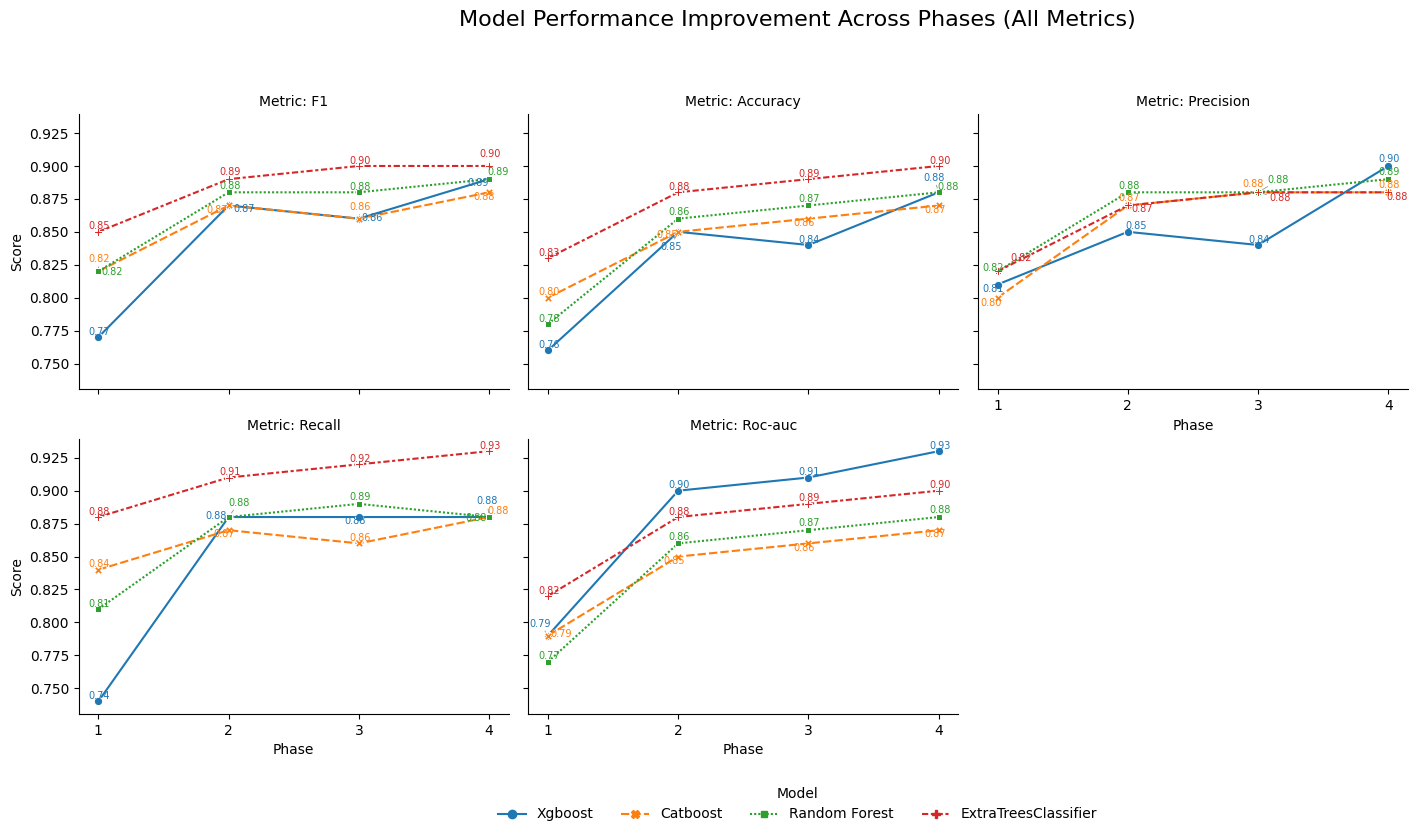

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text  # <-- 1. Import the library

# 1. Melt the DataFrame (same as before)
df_melted = df.melt(
    id_vars=['Phase', 'Model'],
    value_vars=['F1', 'Accuracy', 'Precision', 'Recall', 'Roc-auc'],
    var_name='Metric',
    value_name='Score'
)

# 2. Create a faceted line plot (same as before)
g = sns.relplot(
    data=df_melted,
    x='Phase',
    y='Score',
    hue='Model',
    style='Model',
    col='Metric',
    kind='line',
    col_wrap=3,
    markers=True,
    height=4,
    aspect=1.2
)

# 3. Add text labels and let adjustText position them
for ax in g.axes.flat:
    if not ax.lines:
        continue
    
    texts = []  # <-- Store text objects for this specific axis
    
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        
        for x, y in zip(x_data, y_data):
            if pd.notna(y):
                texts.append(
                    ax.text(
                        x, 
                        y,          # <-- No more manual y-offset
                        f'{y:.2f}', 
                        ha='center', 
                        fontsize=7,
                        color=line.get_color()
                    )
                )
    
    # <-- 4. After creating all texts for the axis, run adjust_text
    if texts:
        adjust_text(
            texts, 
            ax=ax,
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5) # Add faint lines
        )

# 5. Move the legend (same as before)
sns.move_legend(
    g, "lower center", bbox_to_anchor=(.5, 0),
    ncol=4, title='Model', frameon=False
)

# 6. Adjust layout (same as before)
g.fig.suptitle('Model Performance Improvement Across Phases (All Metrics)', y=1.03, fontsize=16)
g.set_titles("Metric: {col_name}")
g.set_xlabels("Phase")
g.set_ylabels("Score")
plt.xticks(df['Phase'].unique())
g.fig.subplots_adjust(bottom=0.15, top=0.9)

plt.show()

In [9]:
!pip install adjustText

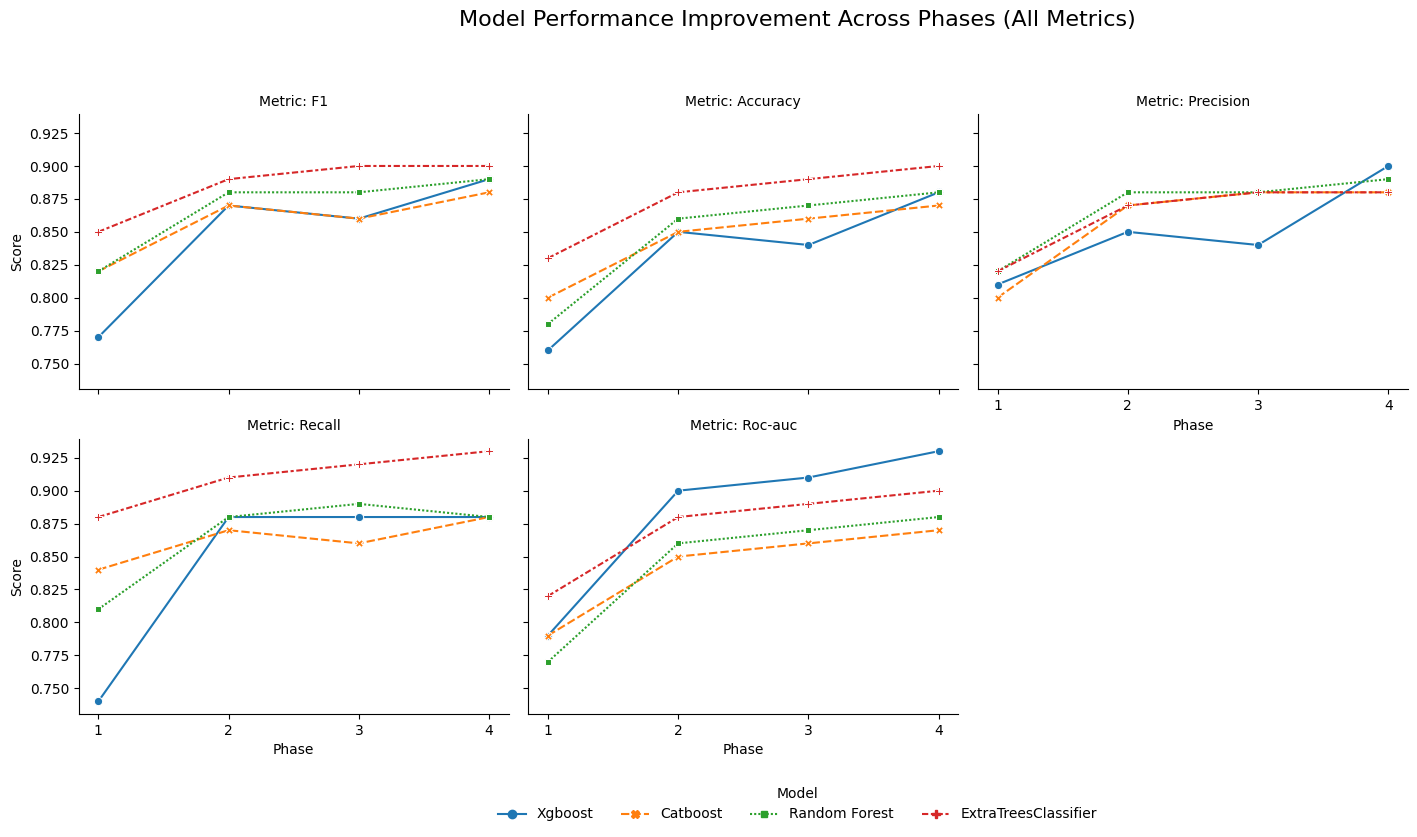

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melt the DataFrame
df_melted = df.melt(
    id_vars=['Phase', 'Model'],
    value_vars=['F1', 'Accuracy', 'Precision', 'Recall', 'Roc-auc'],
    var_name='Metric',
    value_name='Score'
)

# 2. Create a faceted line plot
g = sns.relplot(
    data=df_melted,
    x='Phase',
    y='Score',
    hue='Model',
    style='Model',
    col='Metric',
    kind='line',
    col_wrap=3,
    markers=True,
    height=4,
    aspect=1.2,

)

# <-- Section 3 for adding text has been deleted -->

# 4. Move the legend to the bottom center
sns.move_legend(
    g, 
    "lower center",
    bbox_to_anchor=(.5, 0),
    ncol=4,
    title='Model',
    frameon=False
)

# 5. Adjust plot layout
g.fig.suptitle('Model Performance Improvement Across Phases (All Metrics)', y=1.03, fontsize=16)
g.set_titles("Metric: {col_name}")
g.set_xlabels("Phase")
g.set_ylabels("Score")
plt.xticks(df['Phase'].unique())
g.fig.subplots_adjust(bottom=0.15, top=0.9)

plt.show()

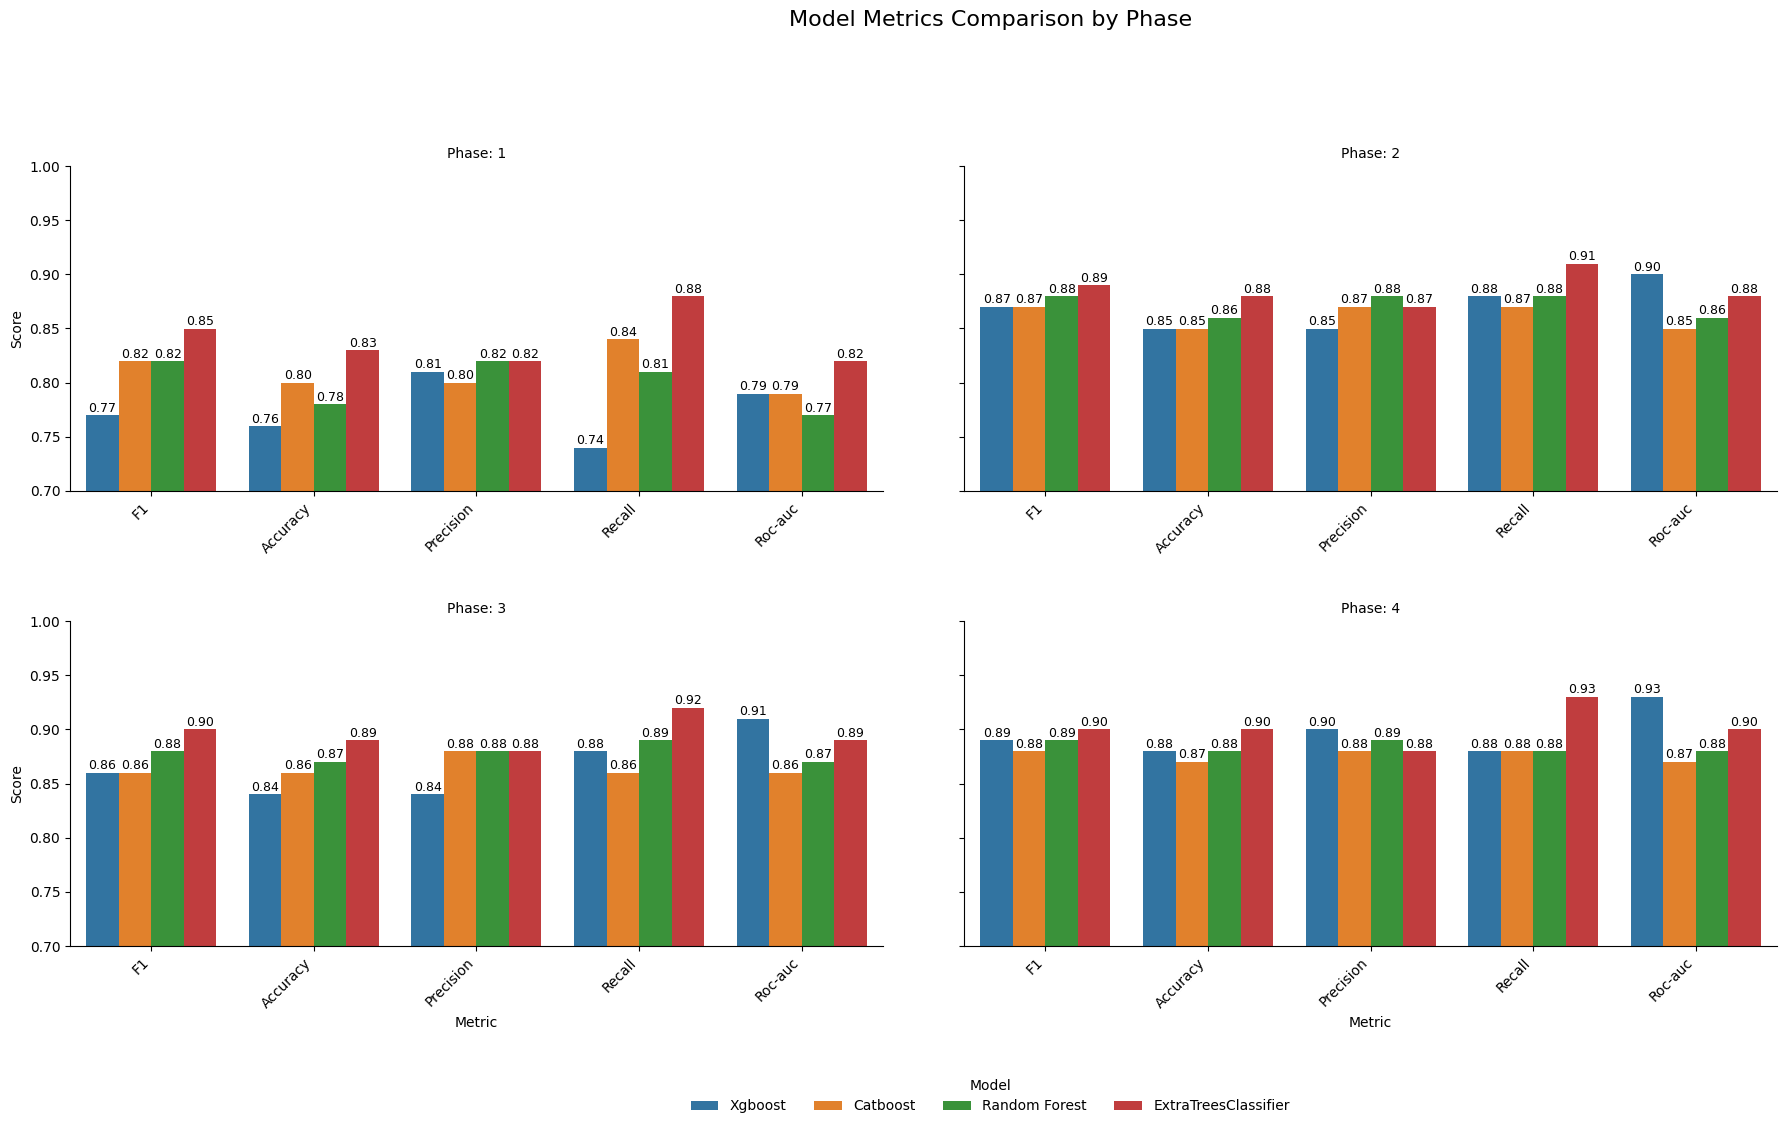

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melt the DataFrame (same as before)
# Assuming 'df' is your original DataFrame
df_melted = df.melt(
    id_vars=['Phase', 'Model'],
    value_vars=['F1', 'Accuracy', 'Precision', 'Recall', 'Roc-auc'],
    var_name='Metric',
    value_name='Score'
)

# 2. Create the faceted bar chart (same as before)
g = sns.catplot(
    data=df_melted,
    kind='bar',
    x='Metric',       
    y='Score',        
    hue='Model',      
    col='Phase',      
    col_wrap=2,       
    height=6,         
    aspect=1.5,       
    legend_out=True,
    sharex=False
)

# 3. Add data labels (same as before)
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='center', fontsize=9, color='black',
            xytext=(0, 5), textcoords='offset points'
        )

# 4. Customize the plot (same as before)
g.fig.suptitle('Model Metrics Comparison by Phase', y=1.03, fontsize=16)
g.set_titles("Phase: {col_name}")
g.set_axis_labels("Metric", "Score")
g.set(ylim=(0.7, 1.0))

# 5. Rotate labels (same as before)
for ax in g.axes.flat:
    if ax.get_xticklabels():
        labels = ax.get_xticklabels()
        plt.setp(labels, rotation=45, horizontalalignment='right')

# --- THIS IS THE FIX (Section 6 & 7) ---

# 6. Move the legend to sit just below the plots
sns.move_legend(
    g, 
    "upper center",             # <-- Change loc to "upper center"
    bbox_to_anchor=(.5, 0.15),  # <-- Anchor its TOP to the 15% line
    ncol=4, 
    title='Model', 
    frameon=False
)

# 7. Adjust layout
# Reserve 15% at the bottom for labels and legend
g.fig.subplots_adjust(bottom=0.25, top=0.9, hspace=0.4, wspace=0.1) # <-- bottom=0.15

# --- END OF FIX ---

plt.show()